## Librerias y funciones

In [1]:
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
from scipy import stats
from geopy.geocoders import Nominatim

In [2]:
#FUNCION PARA COMPARAR DENSIDAD DE DISTRIBUCIONES ANTES Y DESPUES DE IMPUTAR
def comparison_dist(data_1:pd.Series, data_2:pd.Series, action:str, x_label:str, fig_size:tuple):
    plt.style.use("bmh")    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=fig_size)

    #GRAFICO 1
    sns.kdeplot(x=data_1, ax=ax[0])
    ax[0].set_title('Distribucion original')
    ax[0].set_xlabel(x_label)

    #GRAFICO 2
    sns.kdeplot(data=data_2, ax=ax[1])
    ax[1].set_xlabel(x_label)
    ax[1].set_title(f'Distribucion despues de {action}') #ACTION(IMPUTAR, ELIMINAR)

    #PLOTEO
    plt.tight_layout()
    plt.show()
    plt.style.use("default")

## Exploracion de dataset

In [3]:
df = pd.read_json('https://raw.githubusercontent.com/arielRas/DataAdqusition/master/API%20MercadoLibre/MeliCarPublications.json')
df.head(3)

,id,category_id,title,condition,car_year,brand,model,version,engine,engine_power,...,transmission,currency,price,seller_id,seller_nickname,is_car_shop,seller_country,seller_state,seller_city,seller_neighborhood
0,MLA1413685801,MLA1744,Volkswagen Gol 1.4 3ptas Año 2013 - Liv Motors,Usado,2013,Volkswagen,Gol,1.4 Power 83cv 3 p,1.4,83 hp,...,Manual,ARS,6000000,780050555,LIVMOTORS 2,False,Argentina,Bs.As. G.B.A. Norte,Vicente López,Munro
1,MLA1406864357,MLA1744,Volkswagen Gol 2012 1.4 Power Ps+ac 83cv,Usado,2012,Volkswagen,Gol,1.4 Power Ps+ac 83cv,1.4,83 hp,...,Manual,USD,10500,210095605,MASSEYGROUP EXCLUSIVOS,False,Argentina,Bs.As. G.B.A. Norte,Vicente López,Olivos
2,MLA1677544030,MLA1744,Volkswagen Gol Power 3p 2012 Financiación Con Dni,Usado,2012,Volkswagen,Gol,1.4 Power Ps+ac 83cv,1.4,83 hp,...,Manual,ARS,5800000,5571520,DASAUTOS2014,False,Argentina,Bs.As. G.B.A. Sur,Berazategui,Berazategui


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12196 entries, 0 to 12195
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12196 non-null  object 
 1   category_id          12196 non-null  object 
 2   title                12196 non-null  object 
 3   condition            12196 non-null  object 
 4   car_year             12196 non-null  int64  
 5   brand                12196 non-null  object 
 6   model                12196 non-null  object 
 7   version              12196 non-null  object 
 8   engine               11885 non-null  object 
 9   engine_power         11349 non-null  object 
 10  doors                12196 non-null  int64  
 11  km                   12196 non-null  object 
 12  fuel_type            12196 non-null  object 
 13  traction_control     11809 non-null  object 
 14  passenger_capacity   11275 non-null  float64
 15  transmission         11906 non-null  obje

In [5]:
df.describe()

,car_year,doors,passenger_capacity,price,seller_id
count,12196.000000,12196.000000,11275.000000,1.219600e+04,1.219600e+04
mean,2015.917678,4.354870,4.978271,1.054430e+07,3.439563e+08
std,6.109399,0.676806,0.249476,1.309497e+07,3.748558e+08
min,1988.000000,2.000000,2.000000,1.230000e+02,7.465000e+03
25%,2012.000000,4.000000,5.000000,1.560000e+04,9.898473e+07
50%,2016.000000,4.000000,5.000000,7.500000e+06,2.014092e+08
75%,2022.000000,5.000000,5.000000,1.675000e+07,4.105601e+08
max,2024.000000,5.000000,7.000000,5.860000e+08,1.713678e+09


## DataWrangling

### Variable ***condition***

In [6]:
#VALORES UNICOS EN LA VARIABLE
df.condition.unique()

array(['Usado', 'Nuevo'], dtype=object)

In [7]:
#REEMPLAZO DE VALORES Y CAMBIO DE TIPO DE DATO
df.rename(columns={'condition': 'is_new'}, inplace=True)
df.is_new = df.is_new.str.replace('Usado', '0')
df.is_new = df.is_new.str.replace('Nuevo', '1')
df.is_new = df.is_new.astype(int)
df.is_new.describe()

count    12196.000000
mean         0.204165
std          0.403107
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_new, dtype: float64

### Variable ***model***

In [8]:
#CHECK DE VALORES UNICOS EN LA VARIABLE
df.model.unique()

array(['Gol', 'Gol Trend', 'Up!', 'Bora', 'Vento', 'Polo', 'Amarok',
       'Corsa', 'Onix', 'Agile', 'Prisma', 'Cruze', 'Aveo G3', 'Aveo',
       'Tracker', 'Clio', 'Sandero', 'Fluence', 'Logan', 'Kangoo',
       'Kangoo Express', 'Partner Patagónica', 'Captur', 'Duster',
       'CAPTUR INTENS 2.0', 'CAPTUR LIFE 1.6', '206', '207', '208', '307',
       '308', '407', '408', 'Cronos', 'Toro', 'Argo', 'Fiorino', 'Pulse',
       '2022', 'Strada', 'ARGO PRECISION 1.8', '864 - ARGO HGT 1.8',
       'Palio', 'Siena', 'Uno', 'Fiesta', 'Ecosport', 'Ka', 'Ranger',
       'Ranger Raptor', 'Nueva Ranger', 'RANGER XLS AT AWD 3.0 V6 250 CV',
       'RANGER XL 2.0 TURBO DIESEL CD 4X4 MANUAL',
       'FORD RANGER LIMITED + 3.0 V6 DIESEL CD 4X4 10AT #GP', 'Focus III',
       'Fiesta Kinetic Design', 'Focus 2', 'Focus', 'Focus II',
       'Ford focus titanium', 'Focus 3', 'Etios', 'Hilux Pick-Up',
       'Hilux', 'Hilux Chassi', 'SW4', 'Hilux SW4', '4x4', 'Corolla',
       'Yaris', 'Civic'], dtype=obje

In [9]:
#REEMPLAZO DE VALORES
df.model = df.model.str.replace(r'.*Argo.*|.*ARGO.*', 'Argo', regex=True)
df.model = df.model.str.replace(r'.*Capture.*|.*CAPTUR.*', 'Captur', regex=True)
df.model = df.model.str.replace(r'.*Focus.*|.*FOCUS.*|.*focus.*', 'Focus', regex=True)
df.model = df.model.str.replace(r'.*Ranger.*|.*RANGER.*', 'Ranger', regex=True)
df.model = df.model.str.replace(r'.*Hilux.*|.*HILUX.*', 'Hilux', regex=True)
df.model = df.model.str.replace(r'.*Fiesta.*|.*FIESTA.*', 'Fiesta', regex=True)
df.model = df.model.str.replace(r'.*Aveo.*|.*AVEO.*', 'Aveo', regex=True)
df.model = df.model.str.replace('SW4', 'Hilux')
df.model = df.model.str.replace('Kangoo Express', 'Kangoo')
df.model = df.model.str.replace('Partner Patagónica', 'Partner')
df.model.unique()

array(['Gol', 'Gol Trend', 'Up!', 'Bora', 'Vento', 'Polo', 'Amarok',
       'Corsa', 'Onix', 'Agile', 'Prisma', 'Cruze', 'Aveo', 'Tracker',
       'Clio', 'Sandero', 'Fluence', 'Logan', 'Kangoo', 'Partner',
       'Captur', 'Duster', '206', '207', '208', '307', '308', '407',
       '408', 'Cronos', 'Toro', 'Argo', 'Fiorino', 'Pulse', '2022',
       'Strada', 'Palio', 'Siena', 'Uno', 'Fiesta', 'Ecosport', 'Ka',
       'Ranger', 'Focus', 'Etios', 'Hilux', '4x4', 'Corolla', 'Yaris',
       'Civic'], dtype=object)

### Variable ***engine***

#### Conversion de tipo de dato

In [10]:
#CHECK DE VALORES UNICOS DE LA VARIABLE
df.engine.unique()

array(['1.4', '1.6', '1.9', '1.4l', None, 'INYECCION MULTI PUNTO',
       '1.9 DIESEL', '1.8', '1.9 diésel', '1,6', '4 cilindros',
       '1.90 diesel', '1600 audi', 'SD', '2.0', 'MSI',
       'MSI 1.6 16 válvulas 110cv', '1.0', '1.0L', '1', '2',
       '1.9 TURBO DIESEL 100CV', '2.5', '2.0 TDI', '2.5 LUXURY',
       '1.4 tsi', '350 TSI', '1.4 Tsi', '2.0 TSI',
       'TURBO DIESEL INYECCION', '1.6MSI', '1.6 MSI MT', '1.6L',
       'TURBOALIMENTADO', '999 3 Cilindros 101 CV', 'MSI 1.6 16V',
       '1.4TSI', '1.6 MSI', '1.0 170 Tsi', '1.6 16V MSI  - 110CV -',
       '1.6 MSI 110CV', '1.6 msi', '1.6 Msi',
       'TRACK 1.6 MSI MT 1ST EDITION', '170tsi',
       '1.6 MSI o otro depende version.', 'nafta', '1.0  101 CV 170 TSI',
       '1.6 16v 110 hp', '1.6 16v 110hp', '3.0', '2.0 4x2 180cv',
       '2.0 4x2 At 180cv', '2.0 4x2 180CV', '2.0 4X4 140CV',
       '2.0 4x2 140cv', '3.0 258CV', '2.0 180CV', '2.0 140CV',
       '2.0 140cv', '2.0 180cv', '2.0 140 CV', '2.0 180 cv', '3.0L 258CV',
  

In [11]:
#SE QUITAN VALORES ALFABETICOS EN LOS DATOS
df.engine = df.engine.str.replace(r'[^0-9.]', '', regex=True)
df.engine = df.engine.str.strip()
df.engine.unique()

array(['1.4', '1.6', '1.9', None, '', '1.8', '16', '4', '1.90', '1600',
       '2.0', '1.616110', '1.0', '1', '2', '1.9100', '2.5', '350',
       '9993101', '1.616', '1.0170', '1.6110', '1.61', '170', '1.6.',
       '1.0101170', '3.0', '2.042180', '2.044140', '2.042140', '3.0258',
       '2.0180', '2.0140', '2.018042', '3.06258', '3.025844', '3', '1.7',
       '1.2', '14', '1.4153', '1.6416103', '312', '1.23', '1.5', '1.6115',
       '1.616161022', '1.3', '143', '2.2', '1.1', '1300', '2.0170',
       '2.0210', '3.2', '3.06250', '2.0170405', '3.06', '6', '3.06250600',
       '2.0213', '2.0210500', '6250', '3.02506', '63.0.250', '1.65',
       '1.999.1706.6002024.450', '2.8', '2.4', '4.0', '2.8204', '1.5107',
       '1.6261'], dtype=object)

In [12]:
#FUNCION PARA QUITAR O AGREGAR DECIMALES
def get_engine(engine):
    if (not engine) | (pd.isna(engine)): return None        
    if re.search(r'^[^.]*$', engine): return None        
    
    if re.search(r'^\d\.', engine):
        if len(engine) == 1:
            engine = engine + '.0'
        elif len(engine) > 3:
            engine = engine[:3]
        return engine
    else:
        return None

In [13]:
#APLICACION DE LA FUNCION Y CAMBIO DE TIPO DE DATO
df.engine = df.engine.apply(get_engine)
df.engine = df.engine.astype(float)
df.engine.unique()

array([1.4, 1.6, 1.9, nan, 1.8, 2. , 1. , 2.5, 3. , 1.7, 1.2, 1.5, 1.3,
       2.2, 1.1, 3.2, 2.8, 2.4, 4. ])

In [14]:
#INFORMACION DE LA VARIABLE
df.engine.info()

<class 'pandas.core.series.Series'>
Index: 12196 entries, 0 to 12195
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
11733 non-null  float64
dtypes: float64(1)
memory usage: 190.6 KB


#### Revision e Imputacion de datos nulos

In [15]:
#VALORES NULOS
print(f'Cantidad de nulos: {df.engine.isna().sum()}')

Cantidad de nulos: 463


In [16]:
#FUNCION PARA IMPUTAR VALORES DE LA MEDIANA SEGUN EL MODELO DEL VEHICULO
def get_median(model:str)->float:
    condition = (df.model == model) & (df.engine.notna())
    return df.loc[condition, 'engine'].median()

In [17]:
#COPIA DE LA VARIABLE ANTES DE IMPUTAR
engine_nan = df.engine.copy()

#IMPUTACION DE VALORES NULOS
df.engine = df.apply(lambda x:
                     get_median(x.model) if pd.isna(x.engine) else x.engine,
                     axis=1)

In [18]:
#CANTIDAD DE NULOS DESPUES DE LA IMPUTACION
print(f'Cantidad de nulos: {df.engine.isna().sum()}')

Cantidad de nulos: 1


In [19]:
#SE ELIMINA EL VALOR NULO UNICO QUE QUEDABA
df = df.loc[df.engine.notna()]
print(f'Cantidad de nulos: {df.engine.isna().sum()}')

Cantidad de nulos: 0


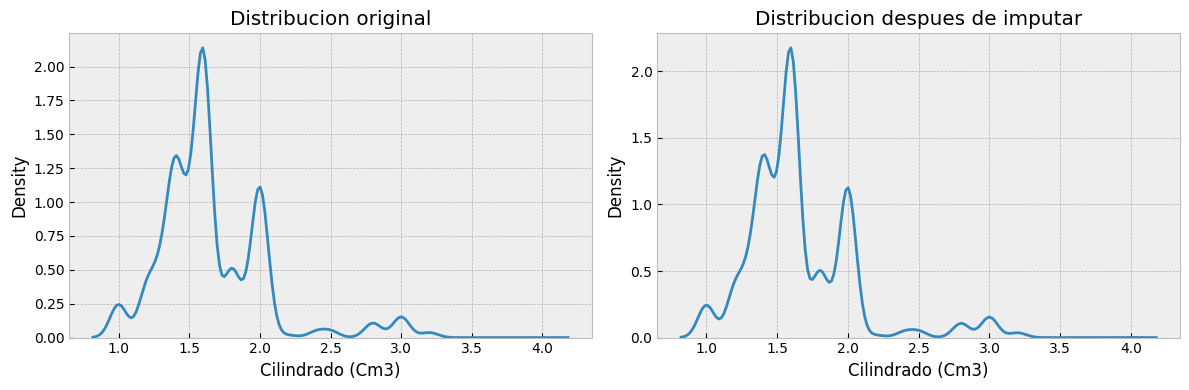

In [20]:
#COMPARACION DE DISTRIBUCIONES
comparison_dist(engine_nan, df.engine, 'imputar', 'Cilindrado (Cm3)',(12,4))

In [21]:
#SE LIBERAN RECURSOS
del engine_nan

### Variable ***engine_power***

#### Conversion de tipo de dato

In [22]:
#CHECK DE VALORES UNICOS EN LA VARIABLE
df.engine_power.unique()

array(['83 hp', None, '92 hp', '90 hp', '64 hp', '101 cv', '98 hp',
       '54 hp', '101 hp', '75 hp', '75 cv', '180 hp', '100 hp', '116 hp',
       '211 hp', '150 hp', '170 hp', '200 hp', '115 hp', '110 hp',
       '140 hp', '105 hp', '105 cv', '150 cv', '224 hp', '258 hp',
       '102 hp', '70 hp', '94 hp', '80.6 hp', '65 hp', '60 hp', '92 cv',
       '98 cv', '153 hp', '141 hp', '163 hp', '103 hp', '132 hp', '74 hp',
       '172 hp', '145 hp', '143 hp', '190 hp', '85 hp', '115 cv', '85 cv',
       '114 hp', '95 hp', '89 hp', '143 cv', '138 hp', '156 hp', '106 hp',
       '175 hp', '208 hp', '165 hp', '152 hp', '270 hp', '225 hp',
       '216 hp', '160 hp', '136 hp', '99 hp', '130 hp', '99 cv', '87 hp',
       '120 hp', '170 cv', '72 hp', '82 hp', '87 cv', '68 hp', '49 hp',
       '120 cv', '123 hp', '123 cv', '63 hp', '67 hp', '210 hp', '250 hp',
       '213 hp', '125 hp', '166 hp', '99.2 hp', '125 cv', '103 cv',
       '177 hp', '238 hp', '204 hp', '171 hp', '134 hp', '140 cv',
   

In [23]:
#SE QUITA PARTE ALFABETICA DE VARIABLE Y SE CAMBIA TIPO DE DATO
df.engine_power = df.engine_power.str.replace(r'hp|cv', '', regex=True)
df.engine_power = df.engine_power.str.strip()
df.engine_power = df.engine_power.astype(float)
df.engine_power.unique()

array([ 83. ,   nan,  92. ,  90. ,  64. , 101. ,  98. ,  54. ,  75. ,
       180. , 100. , 116. , 211. , 150. , 170. , 200. , 115. , 110. ,
       140. , 105. , 224. , 258. , 102. ,  70. ,  94. ,  80.6,  65. ,
        60. , 153. , 141. , 163. , 103. , 132. ,  74. , 172. , 145. ,
       143. , 190. ,  85. , 114. ,  95. ,  89. , 138. , 156. , 106. ,
       175. , 208. , 165. , 152. , 270. , 225. , 216. , 160. , 136. ,
        99. , 130. ,  87. , 120. ,  72. ,  82. ,  68. ,  49. , 123. ,
        63. ,  67. , 210. , 250. , 213. , 125. , 166. ,  99.2, 177. ,
       238. , 204. , 171. , 134. , 107. , 272. , 127. , 154. ])

In [24]:
#INFO DE LA VARIABLE
df.engine_power.info()

<class 'pandas.core.series.Series'>
Index: 12195 entries, 0 to 12195
Series name: engine_power
Non-Null Count  Dtype  
--------------  -----  
11349 non-null  float64
dtypes: float64(1)
memory usage: 190.5 KB


#### Imputacion de datos nulos

In [25]:
#CANTIDAD DE VALORES NULOS EN LA VARIABLE
print(f'Cantidad de nulos: {df.engine_power.isna().sum()}')

Cantidad de nulos: 846


In [26]:
#COPIA DELA VARIABLE SIN IMPUTAR
engine_power_nan = df.engine_power.copy()

In [27]:
#FUNCION PARA EXTRAER LA MODA DE LA VARIABLE ENGINE SEGUN EL MODELO DEL VEHICULO
def get_mode(filter:str, var_name:str):
    condition = (df.model == filter) & (df[var_name].notna())
    mode = df.loc[condition, var_name].mode().item()
    return mode

In [28]:
#IMPUTACION DE DATOS NULOS
df.engine_power = df.apply(lambda x: 
                           get_mode(x.model, 'engine_power') if pd.isna(x.engine_power) else x.engine_power,
                           axis=1)

print(f'Cantidad de nulos: {df.engine_power.isna().sum()}')

Cantidad de nulos: 0


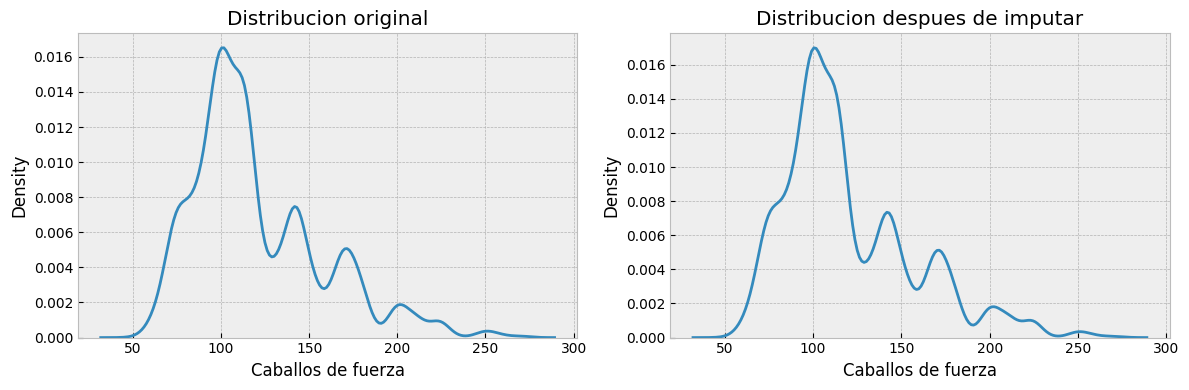

In [29]:
#COMPARACION DE DISTRIBUCIONES
comparison_dist(engine_power_nan, df.engine_power, 'imputar', 'Caballos de fuerza',(12,4))

In [30]:
#SE LIBERAN RECURSOS
del engine_power_nan

### Variable ***km***

In [31]:
#CHEC VALORES DE LA VARIABLE
df.km.head()

0    108000 km
1      8000 km
2    122000 km
3    141000 km
4    118400 km
Name: km, dtype: object

In [32]:
#SE QUITAN VALORES ALFABETICOS DE LA VARIABLE
df.km = df.km.str.replace('km', '')

#SE QUITAN ESPACIOS VACIOS Y SE CAMBIA EL TIPO DE DATO
df.km = df.km.str.strip()
df.km = df.km.astype(int)
df.km.describe()

count     12195.000000
mean      86721.969988
std       72919.504582
min           0.000000
25%       14450.000000
50%       86000.000000
75%      130000.000000
max      999999.000000
Name: km, dtype: float64

In [33]:
#CHECK VALORES ATIPICOS
count = df.loc[df.km > 300000].shape[0]
perc = (count/df.shape[0])*100
print(f'Cantidad de registros mayores de 300.000km: {count}')
print(f'Proporcion del total de datos: {perc:.2f}%')

Cantidad de registros mayores de 300.000km: 82
Proporcion del total de datos: 0.67%


In [34]:
#SE ELIMINAN VALORES OUTLIERS
df = df.loc[df.km < 300000]
df.km.describe()

count     12091.000000
mean      84187.192953
std       66515.893550
min           0.000000
25%       12950.000000
50%       85000.000000
75%      130000.000000
max      299000.000000
Name: km, dtype: float64

### Variable ***fuel_type***

In [35]:
#CHECK VALORES UNICOS DE LA VARIABLE
df.fuel_type.unique()

array(['Nafta', 'Diésel', 'Nafta/GNC', 'Híbrido', 'Eléctrico', 'GNC',
       'Híbrido/Nafta'], dtype=object)

In [36]:
#REEMPLAZO DE VALORES
df.fuel_type = df.fuel_type.str.replace(r'^GNC$', 'Nafta/GNC', regex=True)
df.fuel_type = df.fuel_type.str.replace('Híbrido/Nafta', 'Híbrido')
df.fuel_type.unique()

array(['Nafta', 'Diésel', 'Nafta/GNC', 'Híbrido', 'Eléctrico'],
      dtype=object)

### Variable ***traction_control***

In [37]:
#CHECK DE VALORES UNICOS DE LA VARIABLE
df.traction_control.unique()

array(['Delantera', None, 'Trasera', '4x2', 'Integral', '4x4'],
      dtype=object)

In [38]:
#CHECK DE VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.traction_control.isna().sum()}')

Cantidad de valores nulos en la variable: 383


In [39]:
#IMPUTACION DE VALORES NULOS POR MODA SEGUN EL MODELO DEL VEHICULO
df.traction_control = df.apply( lambda x:
                                get_mode(x.model, 'traction_control') 
                                    if pd.isna(x.traction_control) 
                                    else x.traction_control,
                                axis=1)

#CHECK DE VALORES NULOS DESPUES DE IMPUTAR
print(f'Cantidad de valores nulos en la variable: {df.traction_control.isna().sum()}')

Cantidad de valores nulos en la variable: 0


### Variable ***passenger_capacity***

In [40]:
#INFO DE LA VARIABLE
df.passenger_capacity.describe()

count    11174.000000
mean         4.978343
std          0.247562
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: passenger_capacity, dtype: float64

In [41]:
#CHECK DE VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.passenger_capacity.isna().sum()}')

Cantidad de valores nulos en la variable: 917


In [42]:
#IMPUTACION DE VALORES NULOS POR MODA SEGUN EL MODELO DEL VEHICULO
df.passenger_capacity = df.apply(lambda x:
                                 get_mode(x.model, 'passenger_capacity')
                                    if pd.isna(x.passenger_capacity)
                                    else x.passenger_capacity,
                                axis=1)

#CHECK DE VALORES NULOS DESPUES DE IMPUTAR
print(f'Cantidad de valores nulos en la variable: {df.passenger_capacity.isna().sum()}')

Cantidad de valores nulos en la variable: 0


### Variable ***transmission***

In [43]:
#CHECK VALORES UNICOS EN LA VARIABLE
df.transmission.unique()

array(['Manual', None, 'Automática', 'Automática secuencial'],
      dtype=object)

In [44]:
#CHECK VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.transmission.isna().sum()}')

Cantidad de valores nulos en la variable: 286


In [45]:
#IMPUTACION DE VALORES NULOS POR LA MODA SEGUN EL MODELO
df.transmission = df.apply( lambda x:
                            get_mode(x.model, 'transmission')
                                if pd.isna(x.transmission)
                                else x.transmission,
                            axis=1)

#CHECK VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.transmission.isna().sum()}')

Cantidad de valores nulos en la variable: 0


### Variable ***price*** 

#### Unificacion de valor del automovil en moneda USD

In [46]:
#TIPOS DE MONEDAS QUE DESCRIBEN EL PRECIO
df.currency.unique()

array(['ARS', 'USD'], dtype=object)

In [47]:
#SE CONVIERTE A USD TODOS AQUELLOS PRECIOS VALUADOS EN PESOS
#A LA FECHA DE RECOPILACION DE DATOS:  1 USD = 1020 ARS
df.price = df.price.astype(float)
df.loc[df.currency == 'ARS', 'price'] = df.price.apply(lambda x: x/1020)

In [48]:
#SE RENOMBRA LA VARIABLE PRICE
df.rename(columns={'price': 'usd_price'}, inplace=True)

#SE ELIMINA LA VARIABLE CURRENCY
df.drop(columns='currency', inplace=True)
df.usd_price.describe()

count     12091.000000
mean      14228.157777
std       11867.268925
min         123.000000
25%        6900.000000
50%       10784.313725
75%       18500.000000
max      574509.810784
Name: usd_price, dtype: float64

#### Valores atipicos

In [53]:
#SE EVALUA LA CANTIDAD DE VEHICULOS CPN PRECIOS POR ARRIVA DE LOS 100.000USD
df.loc[df.usd_price > 100000, ['brand', 'model', 'usd_price']].round(2)

,brand,model,usd_price
5644,Peugeot,206,343137.25
10156,Ford,Ranger,574509.81


In [54]:
#SE ELIMINAN LOS PRECIOS MAYORES A 100.000USD
df = df.loc[df.usd_price < 100000]

#CHECK DE VALORES
print(f'Precios mayores a 100.000 USD: {df.loc[df.usd_price > 100000].shape[0]}')

Precios mayores a 100.000 USD: 0


In [55]:
#INFO DE LA VARIABLE
df.usd_price.describe()

count    12089.000000
mean     14154.604071
std      10292.293494
min        123.000000
25%       6900.000000
50%      10784.313725
75%      18500.000000
max      88000.000000
Name: usd_price, dtype: float64

### Variable ***seller_state***

In [56]:
#CHECK DE VALORES UNICOS EN LA VARIABLE
df.seller_state.unique()

array(['Bs.As. G.B.A. Norte', 'Bs.As. G.B.A. Sur', 'Capital Federal',
       'Bs.As. G.B.A. Oeste', 'Buenos Aires Interior',
       'Bs.As. Costa Atlántica', 'Córdoba', 'Salta', 'San Luis',
       'Entre Ríos', 'Santa Fe', 'Mendoza', 'Corrientes', 'La Pampa',
       'Neuquén', 'Misiones', 'Chaco', 'Tucumán', 'Santiago del Estero',
       'San Juan', 'Chubut', 'Santa Cruz', 'Río Negro', 'Jujuy',
       'Formosa', 'Catamarca', 'Tierra del Fuego', 'La Rioja'],
      dtype=object)

In [57]:
#REEMPLAZO DE VALORES
df.seller_state = df.seller_state.str.replace(r'.*Bs\.As.*', 'Buenos Aires', regex=True)
df.seller_state = df.seller_state.str.replace('Buenos Aires Interior', 'Buenos Aires')
df.seller_state.unique()

array(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Salta', 'San Luis',
       'Entre Ríos', 'Santa Fe', 'Mendoza', 'Corrientes', 'La Pampa',
       'Neuquén', 'Misiones', 'Chaco', 'Tucumán', 'Santiago del Estero',
       'San Juan', 'Chubut', 'Santa Cruz', 'Río Negro', 'Jujuy',
       'Formosa', 'Catamarca', 'Tierra del Fuego', 'La Rioja'],
      dtype=object)

In [58]:
#CHECK DE VALORES NULOS
print(f'Cantidad de datos nulos en la variable: {df.seller_state.isna().sum()}')

Cantidad de datos nulos en la variable: 0


### Variables ***latitude*** y ***longitude***

In [59]:
#FUNCION PARA OBTENER LAS COORDENADAS DE UNA CIUDAD
def get_location(city, state, country):
    geolocator = Nominatim(user_agent='getLocation')
    location_string = city + ', ' + state + ', '+ country
    location = geolocator.geocode(location_string)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

In [60]:
#SE AGRUPAN LOS VALORES DE LA CIUDAD PARA REDUCIR LAS CONSULTAS
df_location = df.groupby(['seller_country', 'seller_state', 'seller_city'])['seller_city'].size().reset_index(name='count')
df_location.head()

,seller_country,seller_state,seller_city,count
0,Argentina,Buenos Aires,25 de Mayo,2
1,Argentina,Buenos Aires,9 de Julio,14
2,Argentina,Buenos Aires,Adolfo Alsina,2
3,Argentina,Buenos Aires,Almirante Brown,154
4,Argentina,Buenos Aires,Arrecifes,14


In [61]:
#OBTENCION DE COORDENADAS PARA LAS CIUDADES
df_location[['Latitude', 'longitude']] = df_location.apply( lambda x: 
                                                            pd.Series(get_location( x.seller_city,x.seller_state,x.seller_country)),
                                                            axis=1)

#SE ELIMINA LA COLUMNA PAIS YA QUE TIENE UN SOLO VALOR
df_location.drop(columns=['seller_country', 'count'], inplace=True)
df_location.head()

,seller_state,seller_city,Latitude,longitude
0,Buenos Aires,25 de Mayo,-37.547500,-62.778506
1,Buenos Aires,9 de Julio,-35.443920,-60.884584
2,Buenos Aires,Adolfo Alsina,-34.586319,-58.393838
3,Buenos Aires,Almirante Brown,-34.579634,-60.967745
4,Buenos Aires,Arrecifes,-34.067204,-60.102995


In [62]:
#SE UNEN LOS DATAFRAME
df = pd.merge(df, df_location, on=['seller_state', 'seller_city'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12089 non-null  object 
 1   category_id          12089 non-null  object 
 2   title                12089 non-null  object 
 3   is_new               12089 non-null  int32  
 4   car_year             12089 non-null  int64  
 5   brand                12089 non-null  object 
 6   model                12089 non-null  object 
 7   version              12089 non-null  object 
 8   engine               12089 non-null  float64
 9   engine_power         12089 non-null  float64
 10  doors                12089 non-null  int64  
 11  km                   12089 non-null  int32  
 12  fuel_type            12089 non-null  object 
 13  traction_control     12089 non-null  object 
 14  passenger_capacity   12089 non-null  float64
 15  transmission         12089 non-null 

### Variable ***is_car_shop***

In [63]:
#CHECK DE VALORES UNICOS DE LA VARIABLE
df.is_car_shop = df.is_car_shop.astype(str)
df.is_car_shop.unique()

array(['False', 'True'], dtype=object)

In [64]:
#REEMPLAZO DE VALORES
df.is_car_shop = df.is_car_shop.str.replace('False', '0')
df.is_car_shop = df.is_car_shop.str.replace('True', '1')
df.is_car_shop = df.is_car_shop.astype(int)

### Variables a ***eliminar***

#### Variable ***category_id***

In [65]:
#CHECK DE VALORES UNICOS PARA LA VARIABLE
df.category_id.unique()

array(['MLA1744'], dtype=object)

In [66]:
#SE ELIMINA LA VARIABLE YA QUE SU VALOR SIEMPRE ES EL MISMO
df.drop(columns='category_id', inplace=True)

#### Variable ***title***

In [67]:
#SE ELIMINA LA VARIABLE
df.drop(columns='title', inplace=True)

#### Variables ***seller_id***, ***seller_nickname*** y ***seller_neighborhood***

In [68]:
#SE ELIMINAN LAS VARIABLES DEL VENDEDOR QUE APORTAN VALOR
df.drop(columns=['seller_id', 'seller_nickname', 'seller_neighborhood'], inplace=True)

### Tratamiento de variables ***cualitativas***

In [69]:
#SE MUESTRAN LA CANTIDAD DE VALORES UNICOS PARA LAS VARIABLES CUALITATIVAS
not_var = ['id','seller_state','seller_city','seller_country']

cat_var = [col for col in df.columns if (col not in not_var) and (df[col].dtype == 'object')]

for var in cat_var:
    print(f'{var}: {df[var].nunique()} valores unicos')

brand: 8 valores unicos
model: 49 valores unicos
version: 1954 valores unicos
fuel_type: 5 valores unicos
traction_control: 5 valores unicos
transmission: 3 valores unicos


In [70]:
#IMPORTACION DE LIBRERIA
from sklearn.preprocessing import LabelEncoder

#CODIFICACION DE VARIABLES CUALITATIVAS
for var in cat_var:
    if var != 'version':
        pos_var = df.columns.get_loc(var)+1
        name_var = var+'_cod'
        df.insert(column=name_var, loc=pos_var, value=LabelEncoder().fit_transform(df[var]))

In [71]:
#INFO DE LA VARIABLE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12089 non-null  object 
 1   is_new                12089 non-null  int32  
 2   car_year              12089 non-null  int64  
 3   brand                 12089 non-null  object 
 4   brand_cod             12089 non-null  int32  
 5   model                 12089 non-null  object 
 6   model_cod             12089 non-null  int32  
 7   version               12089 non-null  object 
 8   engine                12089 non-null  float64
 9   engine_power          12089 non-null  float64
 10  doors                 12089 non-null  int64  
 11  km                    12089 non-null  int32  
 12  fuel_type             12089 non-null  object 
 13  fuel_type_cod         12089 non-null  int32  
 14  traction_control      12089 non-null  object 
 15  traction_control_co

### Guardado Provisorio

In [72]:
#df.to_csv('publications_clean.csv', index=False)